# MoBioFP - Matching (Feature-based method)

## Import Python Libraries

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

from skimage.morphology import skeletonize

## Define Global Constants

In [2]:
DATA_DIR = "../data/processed"
PROBE_IMAGE_PATH = DATA_DIR + "/samples/1_i_1_n_1.png"
CANDIDATE_IMAGE_PATH = DATA_DIR + "/samples/1_i_1_w_1.png"

## Load fingerprints images

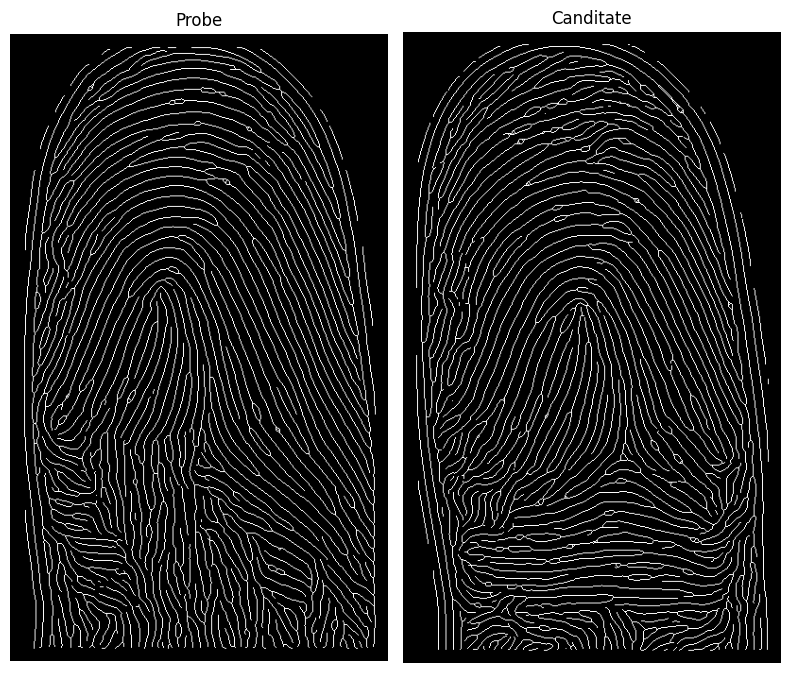

In [3]:
probe = cv2.imread(PROBE_IMAGE_PATH, cv2.IMREAD_GRAYSCALE)
candidate = cv2.imread(CANDIDATE_IMAGE_PATH, cv2.IMREAD_GRAYSCALE)

# Pre-processing
probe = skeletonize(probe).astype(np.uint8) * 255
candidate = skeletonize(candidate).astype(np.uint8) * 255

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.imshow(probe, cmap="gray")
plt.title("Probe")
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(candidate, cmap="gray")
plt.title("Canditate")
plt.axis("off")
plt.tight_layout()
plt.show()

## Brute-Force Matching with ORB Descriptors

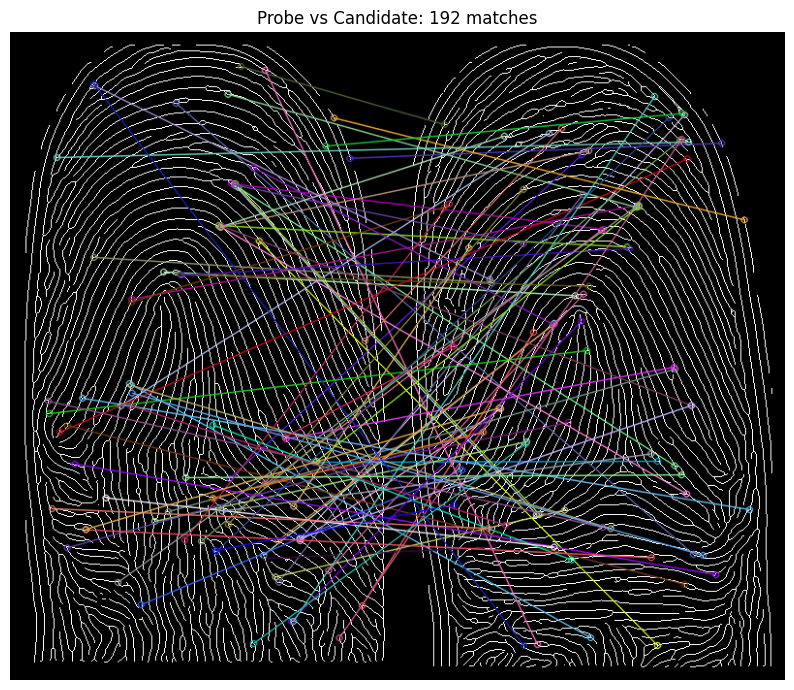

length of matches: 192
length of good matches: 2
similarity_score: 1.0416666666666665


In [4]:
# Initiate ORB detector
orb = cv2.ORB_create()

# find the keypoints and descriptors with ORB
probe_kpt, probe_desc = orb.detectAndCompute(probe, None)
candidate_kpt, candidate_desc = orb.detectAndCompute(candidate, None)

bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = sorted(bf.match(probe_desc, candidate_desc), key=lambda match: match.distance)

similarity = cv2.drawMatches(
    probe, probe_kpt, candidate, candidate_kpt, matches[:80], None, flags=2
)

plt.figure(figsize=(10, 10))
plt.imshow(similarity)
plt.title(f"Probe vs Candidate: {len(matches)} matches")
plt.axis("off")
plt.show()

threshold = 45
length_of_match = len(matches)
good_matches = [match for match in matches if match.distance < threshold]
similarity_score = (len(good_matches) / length_of_match) * 100

print(f"length of matches: {len(matches)}")
print(f"length of good matches: {len(good_matches)}")
print(f"similarity_score: {similarity_score}")


# 1_i_1_w_1.png
# length of matches: 500
# length of good matches: 500
# similarity_score: 100

# 36_o_1_n_5.png
# length of matches: 168
# length of good matches: 7
# similarity_score: 4.166666666666666

# # # # Draw the first 80 matches
# # # result = cv2.drawMatches(
# # #     probe,
# # #     probe_kpt,
# # #     candidate,
# # #     candidate_kpt,
# # #     matches[:80],
# # #     None,
# # #     flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS,
# # # )


# similarity = cv2.drawMatches(probe,probe_kpt,candidate,candidate_kpt,good,None,**draw_params)


# # # store all the good matches as per Lowe's ratio test.
# # good = []
# # for m,n in matches:
# #     if m.distance < 0.75*n.distance:
# #         good.append(m)

# # MIN_MATCH_COUNT = 12

# # if len(good)>MIN_MATCH_COUNT:
# #     src_pts = np.float32([ probe_kpt[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
# #     dst_pts = np.float32([ candidate_kpt[m.trainIdx].pt for m in good ]).reshape(-1,1,2)
# #     M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)
# #     matchesMask = mask.ravel().tolist()
# # else:
# #     print( "Not enough matches are found - {}/{}".format(len(good), MIN_MATCH_COUNT) )
# #     matchesMask = None

# # draw_params = dict(matchColor = (0,255,0), # draw matches in green color
# #                    singlePointColor = None,
# #                    matchesMask = matchesMask, # draw only inliers
# #                    flags = 2)
# # similarity = cv2.drawMatches(probe,probe_kpt,candidate,candidate_kpt,good,None,**draw_params)

# # # plt.figure(figsize=(10, 10))
# # # plt.imshow(similarity)
# # # plt.title(f"Probe vs Candidate: {len(good)} matches")
# # # plt.axis("off")
# # # plt.show()


# # # # Draw the first 80 matches
# # # result = cv2.drawMatches(
# # #     probe,
# # #     probe_kpt,
# # #     candidate,
# # #     candidate_kpt,
# # #     matches[:80],
# # #     None,
# # #     flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS,
# # # )

# # plt.figure(figsize=(10, 10))
# # plt.imshow(result)
# # plt.title(f"Probe vs Candidate: {len(matches)} matches")
# # plt.axis("off")
# # plt.show()

## FLANN based Matcher with ORB Descriptors

Ref: https://docs.opencv.org/4.9.0/d1/de0/tutorial_py_feature_homography.html

In [5]:
# MIN_MATCH_COUNT = 12

# # Initiate ORB detector
# orb = cv2.ORB_create()

# # find the keypoints and descriptors with SIFT
# kp1, des1 = orb.detectAndCompute(probe, None)
# kp2, des2 = orb.detectAndCompute(candidate, None)

# FLANN_INDEX_KDTREE = 1
# index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
# search_params = dict(checks = 50)

# flann = cv2.FlannBasedMatcher(index_params, search_params)
# matches = flann.knnMatch(des1,des2,k=2)

# # store all the good matches as per Lowe's ratio test.
# good = []
# for m,n in matches:
#     if m.distance < 0.7*n.distance:
#         good.append(m)

# if len(good)>MIN_MATCH_COUNT:
#     src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
#     dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)
#     M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)
#     matchesMask = mask.ravel().tolist()
# else:
#     print( "Not enough matches are found - {}/{}".format(len(good), MIN_MATCH_COUNT) )
#     matchesMask = None

# draw_params = dict(matchColor = (0,255,0), # draw matches in green color
#                    singlePointColor = None,
#                    matchesMask = matchesMask, # draw only inliers
#                    flags = 2)
# similarity = cv2.drawMatches(probe,kp1,candidate,kp2,good,None,**draw_params)

# plt.figure(figsize=(10, 10))
# plt.imshow(similarity)
# plt.title(f"Probe vs Candidate: {len(good)} matches")
# plt.axis("off")
# plt.show()